**Install Python libraries**

In [1]:
!pip install -q scikit-learn torch torchvision matplotlib plotly

**Import Libraries**

In [2]:
import os
import numpy as np

from torchvision import transforms
from torch.utils.data import Subset
from torch.backends import cudnn

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

**Set Arguments**

In [3]:
DEVICE = 'cuda'
BATCH_SIZE = 128
LR = 2
MOMENTUM = 0.9         
WEIGHT_DECAY = 1e-4
EPOCHS = 70

MODE = 3            # 0 - Fine Tuning
                    # 1 - LwF
                    # 2 - iCaRL
                    # 3 - iCaRL2

# NB: LwF is iCaRL without exemplars while Fine Tuning is LwF without distillation loss (at implementation level)

####### iCaRL only #######
MEMORY = 2000        # Total number of exemplars
HERDING = True       # Wheter to perform herding or random selection for the exemplar set
CLASSIFIER = 'NME'   # Default 'NME', 'FC' for hybrid1, otherwise an sklearn classifier must be passed

####### iCaRL2 only #######
LR2 = .08      # Learning rate for stabilization phase
EPOCHS2 = 10   # Epochs for stabilization phase 
lambda_ = .2   # Hyper-parameter controlling the weight of the distillation
delta = .25    # Value added to lambda at each incremental step

# iCaRL2
# - Decreasing Weight Decay policy
# - Class_Loss on all samples + lambda * Distill_Loss
#   - The value of lambda increases at each incremental step
#   - The logits for distillation corresponding at the classes learned at 
#     time t are teached by the network at time t
#   - Logits for distillation are raised to 1/2 ( Temperature )
# - A stabilization phase with only Class_Loss on the exemplars is executed
#   after each incremental step



**Load Dataset**

In [4]:
DATA_DIR = './data'
from icarl2.dataset import Cifar100

# Load the dataset with custom class
train_dataset = Cifar100(DATA_DIR, True, transform=transforms.ToTensor())
test_dataset = Cifar100(DATA_DIR, False, transform=transforms.ToTensor())

print(f'Train Dataset: {len(train_dataset)}')
print(f'Test Dataset: {len(test_dataset)}')

Files already downloaded and verified
Files already downloaded and verified
Train Dataset: 50000
Test Dataset: 10000


**Prepare Incremental Batches**

In [5]:
train_batches, test_batches = [], []

for i in range(10):
  train_batch_indexes = train_dataset.__getBatchIndexes__(i)
  
  test_batch_indexes = []
  for j in range(i+1):
    test_indexes = test_dataset.__getBatchIndexes__(j)
    test_batch_indexes += test_indexes

  train_batch = Subset(train_dataset,train_batch_indexes)
  test_batch = Subset(test_dataset,test_batch_indexes)

  train_batches.append(train_batch)
  test_batches.append(test_batch)

**Run Model**


##### BATCH 1 #####

 ### Update Representation ###
   # Epoch: 70/70, LR = 0.08,  Train loss = 0.00771

   # Elapsed time: 5.98

 ### Construct Random Exemplar Set ###
   # Exemplars per class: 5

   # Elapsed time: 5.99

 ### FC Layer ###
   # FC Layer Predicting 
   # FC Layer Accuracy: 0.882

   # Elapsed time: 6.0

 ### NME ###
   # Computing means 
   # NME Predicting 
label_list: [tensor(0), tensor(3), tensor(3), tensor(5), tensor(1), tensor(6), tensor(8), tensor(6), tensor(3), tensor(2), tensor(9), tensor(3), tensor(1), tensor(0), tensor(8), tensor(3), tensor(0), tensor(8), tensor(0), tensor(9), tensor(8), tensor(6), tensor(6), tensor(6), tensor(7), tensor(6), tensor(2), tensor(7), tensor(3), tensor(8), tensor(5), tensor(7), tensor(9), tensor(6), tensor(7), tensor(9), tensor(8), tensor(2), tensor(9), tensor(2), tensor(3), tensor(9), tensor(2), tensor(6), tensor(4), tensor(8), tensor(0), tensor(0), tensor(1), tensor(2), tensor(8), tensor(1), tensor(9), tensor(3), tensor(5), ten

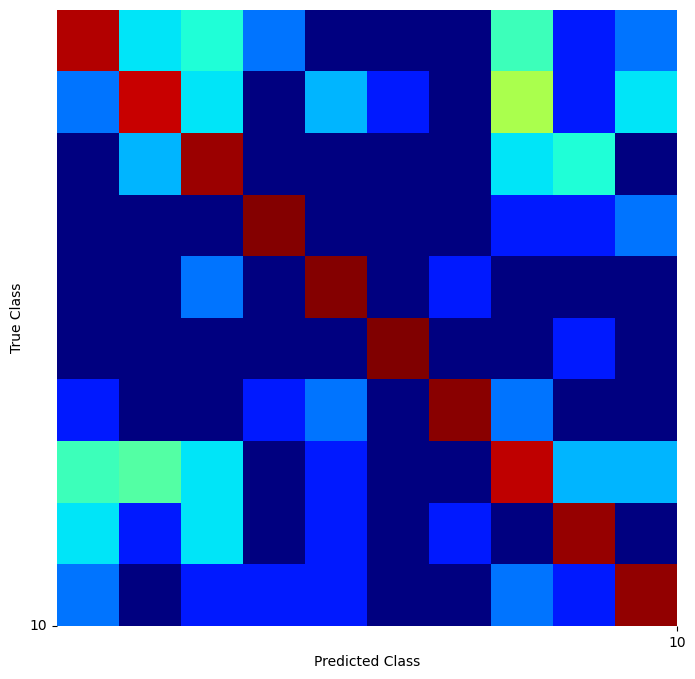


 ### Reduce Exemplar Set ###
   # Exemplars per class: 200

   # Elapsed time: 6.16

##### BATCH 2 #####

 ### Update Representation ###
   # Epoch: 70/70, LR = 0.08,  Train loss = 0.01143

   # Elapsed time: 8.31

 ### Construct Random Exemplar Set ###
   # Exemplars per class: 5

   # Elapsed time: 8.31

 ### FC Layer ###
   # FC Layer Predicting 
   # FC Layer Accuracy: 0.4555

   # Elapsed time: 8.33

 ### Stabilize Network ###
   # Epoch: 10/10, LR = 0.0032,  Train loss = 0.0

   # Elapsed time: 8.43

 ### FC Layer ###
   # FC Layer Predicting 
   # FC Layer Accuracy: 0.4555

   # Elapsed time: 8.45

 ### NME ###
   # Computing means 
   # NME Predicting 
label_list: [tensor(0), tensor(3), tensor(3), tensor(5), tensor(1), tensor(6), tensor(8), tensor(6), tensor(3), tensor(2), tensor(9), tensor(3), tensor(1), tensor(0), tensor(8), tensor(3), tensor(0), tensor(8), tensor(0), tensor(9), tensor(8), tensor(6), tensor(6), tensor(6), tensor(7), tensor(6), tensor(2), tensor(7), tensor(3)

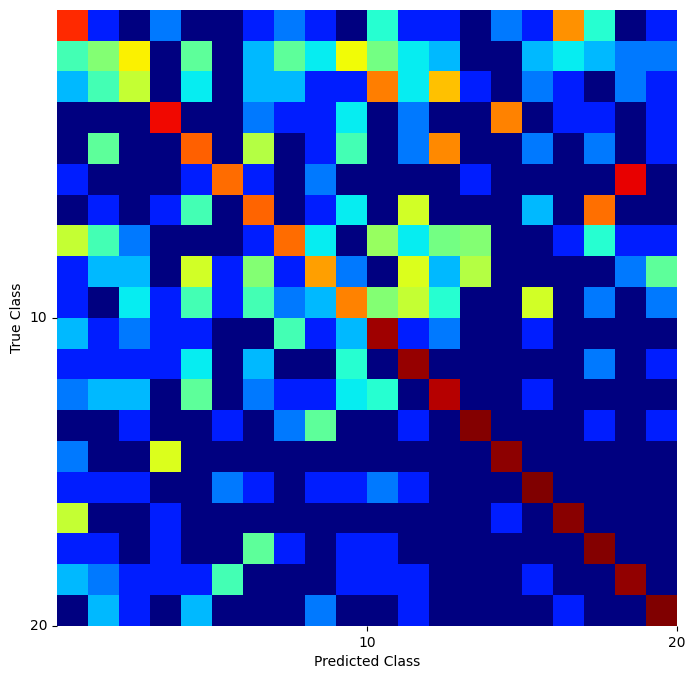


 ### Reduce Exemplar Set ###
   # Exemplars per class: 100

   # Elapsed time: 8.76

##### BATCH 3 #####

 ### Update Representation ###
   # Epoch: 70/70, LR = 0.08,  Train loss = 0.01612

   # Elapsed time: 11.17

 ### Construct Random Exemplar Set ###
   # Exemplars per class: 5

   # Elapsed time: 11.17

 ### FC Layer ###
   # FC Layer Predicting 
   # FC Layer Accuracy: 0.39866666666666667

   # Elapsed time: 11.19

 ### Stabilize Network ###
   # Epoch: 10/10, LR = 0.0032,  Train loss = 0.02088

   # Elapsed time: 11.3

 ### FC Layer ###
   # FC Layer Predicting 
   # FC Layer Accuracy: 0.37633333333333335

   # Elapsed time: 11.32

 ### NME ###
   # Computing means 
   # NME Predicting 
label_list: [tensor(0), tensor(3), tensor(3), tensor(5), tensor(1), tensor(6), tensor(8), tensor(6), tensor(3), tensor(2), tensor(9), tensor(3), tensor(1), tensor(0), tensor(8), tensor(3), tensor(0), tensor(8), tensor(0), tensor(9), tensor(8), tensor(6), tensor(6), tensor(6), tensor(7), tensor(6

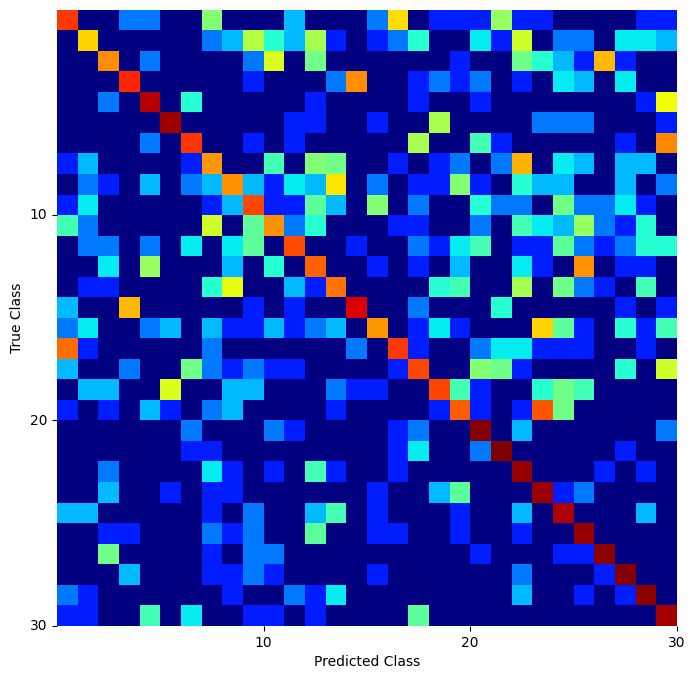


 ### Reduce Exemplar Set ###
   # Exemplars per class: 66

   # Elapsed time: 11.85

##### BATCH 4 #####

 ### Update Representation ###
   # Epoch: 70/70, LR = 0.08,  Train loss = 0.02139

   # Elapsed time: 14.38

 ### Construct Random Exemplar Set ###
   # Exemplars per class: 5

   # Elapsed time: 14.38

 ### FC Layer ###
   # FC Layer Predicting 
   # FC Layer Accuracy: 0.3845

   # Elapsed time: 14.4

 ### Stabilize Network ###
   # Epoch: 10/10, LR = 0.0032,  Train loss = 0.01038

   # Elapsed time: 14.51

 ### FC Layer ###
   # FC Layer Predicting 
   # FC Layer Accuracy: 0.35625

   # Elapsed time: 14.53

 ### NME ###
   # Computing means 
   # NME Predicting 
label_list: [tensor(0), tensor(3), tensor(3), tensor(5), tensor(1), tensor(6), tensor(8), tensor(6), tensor(3), tensor(2), tensor(9), tensor(3), tensor(1), tensor(0), tensor(8), tensor(3), tensor(0), tensor(8), tensor(0), tensor(9), tensor(8), tensor(6), tensor(6), tensor(6), tensor(7), tensor(6), tensor(2), tensor(7), 

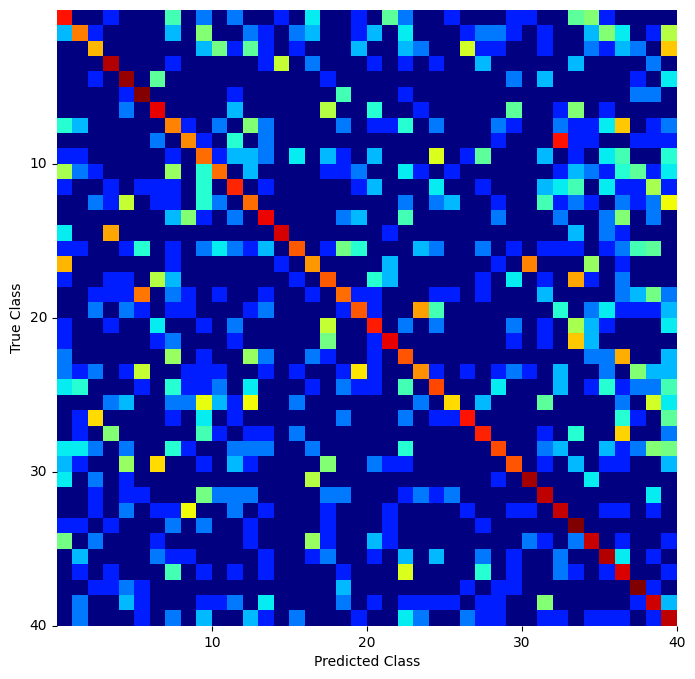


 ### Reduce Exemplar Set ###
   # Exemplars per class: 50

   # Elapsed time: 15.17

##### BATCH 5 #####

 ### Update Representation ###
   # Epoch: 70/70, LR = 0.08,  Train loss = 0.02355

   # Elapsed time: 17.19

 ### Construct Random Exemplar Set ###
   # Exemplars per class: 5

   # Elapsed time: 17.2

 ### FC Layer ###
   # FC Layer Predicting 
   # FC Layer Accuracy: 0.4344

   # Elapsed time: 17.22

 ### Stabilize Network ###
   # Epoch: 10/10, LR = 0.0032,  Train loss = 0.00679

   # Elapsed time: 17.32

 ### FC Layer ###
   # FC Layer Predicting 
   # FC Layer Accuracy: 0.3868

   # Elapsed time: 17.35

 ### NME ###
   # Computing means 
   # NME Predicting 
label_list: [tensor(0), tensor(3), tensor(3), tensor(5), tensor(1), tensor(6), tensor(8), tensor(6), tensor(3), tensor(2), tensor(9), tensor(3), tensor(1), tensor(0), tensor(8), tensor(3), tensor(0), tensor(8), tensor(0), tensor(9), tensor(8), tensor(6), tensor(6), tensor(6), tensor(7), tensor(6), tensor(2), tensor(7), t

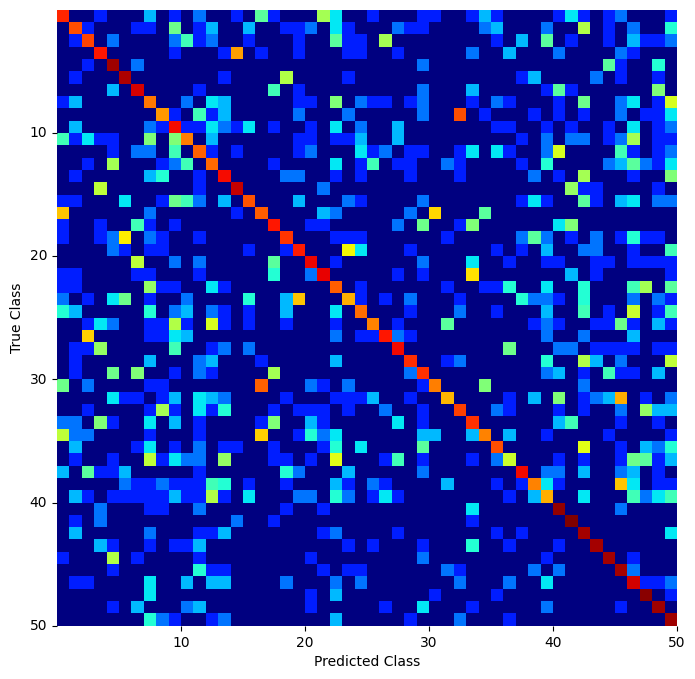


 ### Reduce Exemplar Set ###
   # Exemplars per class: 40

   # Elapsed time: 18.2

##### BATCH 6 #####

 ### Update Representation ###
   # Epoch: 70/70, LR = 0.08,  Train loss = 0.02771

   # Elapsed time: 20.37

 ### Construct Random Exemplar Set ###
   # Exemplars per class: 5

   # Elapsed time: 20.37

 ### FC Layer ###
   # FC Layer Predicting 
   # FC Layer Accuracy: 0.41233333333333333

   # Elapsed time: 20.39

 ### Stabilize Network ###
   # Epoch: 10/10, LR = 0.0032,  Train loss = 0.01139

   # Elapsed time: 20.51

 ### FC Layer ###
   # FC Layer Predicting 
   # FC Layer Accuracy: 0.37233333333333335

   # Elapsed time: 20.53

 ### NME ###
   # Computing means 
   # NME Predicting 
label_list: [tensor(0), tensor(3), tensor(3), tensor(5), tensor(1), tensor(6), tensor(8), tensor(6), tensor(3), tensor(2), tensor(9), tensor(3), tensor(1), tensor(0), tensor(8), tensor(3), tensor(0), tensor(8), tensor(0), tensor(9), tensor(8), tensor(6), tensor(6), tensor(6), tensor(7), tensor(6

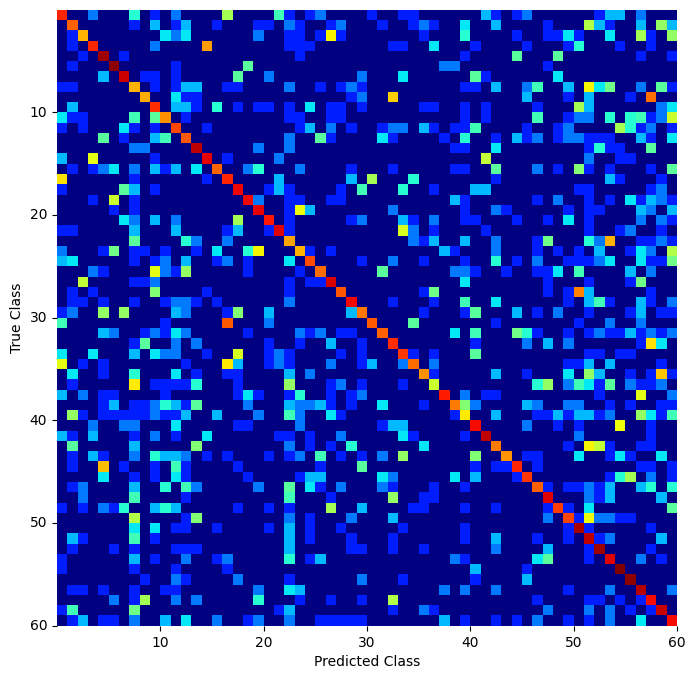


 ### Reduce Exemplar Set ###
   # Exemplars per class: 33

   # Elapsed time: 21.65

##### BATCH 7 #####

 ### Update Representation ###
   # Epoch: 50/70, LR = 0.4,  Train loss = 0.03207

KeyboardInterrupt: 

In [6]:
params = {
    'EPOCHS': EPOCHS,
    'BATCH_SIZE': BATCH_SIZE,
    'LR': LR,
    'MOMENTUM': MOMENTUM,
    'WEIGHT_DECAY': WEIGHT_DECAY,
    'LR2': LR2,          # 0.08
    'EPOCHS2': EPOCHS2,  # 10 
    'lambda': lambda_,   # 0.2
    'delta': delta       # 0.25
    }

cudnn.benchmark

from matplotlib import pyplot as plt
# plt.style.use('seaborn')

from icarl2.resnet_cifar import resnet32
net = resnet32(num_classes=10)

from icarl2.iCaRL import iCaRL
model = iCaRL(memory=MEMORY,device=DEVICE,params=params,plot=True)

from icarl2.iCaRL2 import iCaRL2
model2 = iCaRL2(memory=MEMORY,device=DEVICE,params=params,plot=True)

if MODE == 0:
  accuracies = model.runLwF(train_batches,test_batches,net,fineTune=True)
elif MODE == 1:
  accuracies = model.runLwF(train_batches,test_batches,net)
elif MODE == 2:
  accuracies = model.run(train_batches,test_batches,net,HERDING,CLASSIFIER)
elif MODE == 3:
  accuracies = model2.run(train_batches,test_batches,net)

**Results**

In [ ]:
import numpy as np 
print("### Accuracies per batch: ###")
print([round(accuracy,3) for accuracy in accuracies])
print("\n### Average accuracy: ###")
print(np.mean(accuracies))

### Accuracies per batch: ###
[0.903, 0.838, 0.789, 0.718, 0.695, 0.642, 0.596, 0.564, 0.525, 0.506]

### Average accuracy: ###
0.6775165079365079


In [ ]:
import torch
filename = "checkpoint-cifar100.pth"
f = os.path.join(DATA_DIR, filename)
torch.save(net.state_dict(), f)
print("saved checkpoint:", f)

saved checkpoint: ./icarl2/checkpoint-cifar100.pth
